In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver

from dotenv import load_dotenv
from langchain_perplexity import ChatPerplexity
from langchain.messages import RemoveMessage

In [2]:
load_dotenv()

True

In [3]:
model = ChatPerplexity()

In [4]:
def chat(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

def delete_old_messages(state: MessagesState):
    msgs = state["messages"]

    # if more than 10 messages, delete the earliest 6
    if len(msgs) > 10:
        to_remove = msgs[:6]
        return {"messages": [RemoveMessage(id=m.id) for m in to_remove]}

    return {}

In [5]:
builder = StateGraph(MessagesState)
builder.add_node("chat", chat)
builder.add_node("cleanup", delete_old_messages)

In [6]:
builder.add_edge(START, "chat")
builder.add_edge("chat", "cleanup")   # run deletion after each response
builder.add_edge("cleanup", "__end__")

In [7]:
graph = builder.compile(checkpointer=InMemorySaver())

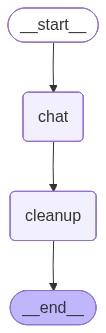

In [8]:
graph

In [9]:
config = {"configurable": {"thread_id": "t1"}}

In [10]:
# Run multiple turns
graph.invoke({"messages": [{"role": "user", "content": "Hi, I'm waseem-akram"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Tell me about LangGraph"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Now explain checkpointers"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Langchain"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Quantum Mechanics"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Gen AI"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is my name"}]}, config)

{'messages': [HumanMessage(content='What is Langchain', additional_kwargs={}, response_metadata={}, id='37ebd027-0e32-49c6-a875-a5c740a6c91a'),
  AIMessage(content='**LangChain is an open-source framework that simplifies building applications powered by large language models (LLMs) by providing modular components, standardized interfaces, and tools for integrating LLMs with external data sources and workflows.**[2][7]\n\n### Core Components\n\nLangChain provides several key building blocks:[1][2]\n\n- **Chains**: Multi-step workflows that combine prompts, LLM calls, and external tools with conditional logic for routing and decision-making.[1]\n- **Agents**: Autonomous systems that dynamically call external APIs or query databases, using LLMs for intelligent decision-making based on input data.[5]\n- **Memory**: Capabilities to retain context across interactions, supporting both simple systems that recall recent conversations and complex structures analyzing historical messages.[2]\n- *

In [14]:
snap = graph.get_state(config)
print("Stored messages after cleanup:", snap.values["messages"])
print("Stored messages after cleanup:", len(snap.values["messages"]))


Stored messages after cleanup: [HumanMessage(content='What is Langchain', additional_kwargs={}, response_metadata={}, id='37ebd027-0e32-49c6-a875-a5c740a6c91a'), AIMessage(content='**LangChain is an open-source framework that simplifies building applications powered by large language models (LLMs) by providing modular components, standardized interfaces, and tools for integrating LLMs with external data sources and workflows.**[2][7]\n\n### Core Components\n\nLangChain provides several key building blocks:[1][2]\n\n- **Chains**: Multi-step workflows that combine prompts, LLM calls, and external tools with conditional logic for routing and decision-making.[1]\n- **Agents**: Autonomous systems that dynamically call external APIs or query databases, using LLMs for intelligent decision-making based on input data.[5]\n- **Memory**: Capabilities to retain context across interactions, supporting both simple systems that recall recent conversations and complex structures analyzing historical m